<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L07_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $K$ - Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def distance(df, x, dtype='euclidean'):
  df = pd.DataFrame(df)
  dist_names = {'manhattan': 1, 'euclidean': 2}
  p = dist_names.get(dtype, 2)
  res = (df.subtract(x, axis=1)**p).sum(axis=1) ** (1/p)
  return res

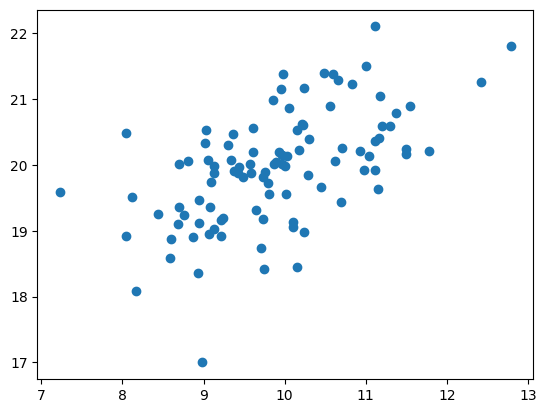

In [ ]:
X = np.random.multivariate_normal(mean=[10,20], cov=[[1,0.5],[0.5,1]], size=100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
x1 = X[np.random.randint(0,X.shape[0]),:]
x2 = X[np.random.randint(0,X.shape[0]),:]

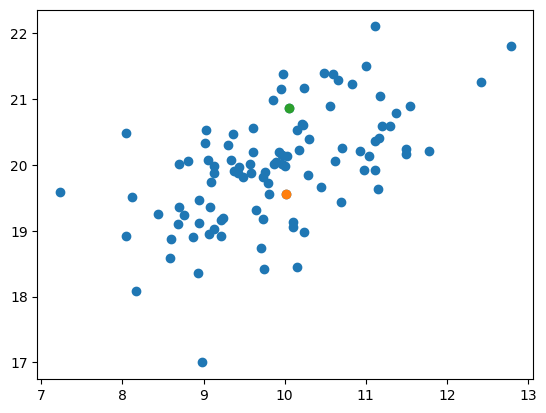

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(x1[0], x1[1])
plt.scatter(x2[0], x2[1])
plt.show()

In [ ]:
labels = pd.DataFrame({
    'x1': distance(X, x1),
    'x2': distance(X, x2)
}).idxmin(axis=1)
labels.head()

0    x2
1    x1
2    x1
3    x1
4    x1
dtype: object

In [ ]:
x1 = X[labels == 'x1'].mean(axis=0)
x2 = X[labels == 'x2'].mean(axis=0)

In [ ]:
x1, x2

(array([ 9.47994809, 19.46811099]), array([10.57559356, 20.79209163]))

In [ ]:
i = 0
max_iter = 10
x1 = X[np.random.randint(0,X.shape[0]),:]
x2 = X[np.random.randint(0,X.shape[0]),:]
while i < max_iter:
  labels = pd.DataFrame({
      'x1': distance(X, x1),
      'x2': distance(X, x2)}).idxmin(axis=1)
  x1 = X[labels == 'x1'].mean(axis=0)
  x2 = X[labels == 'x2'].mean(axis=0)
  i += 1
labels = pd.DataFrame({
    'x1': distance(X, x1),
    'x2': distance(X, x2)}).idxmin(axis=1)
labels.replace({'x1':1, 'x2':2}, inplace=True)
print(labels)

0     2
1     1
2     2
3     2
4     2
     ..
95    1
96    1
97    2
98    2
99    1
Length: 100, dtype: int64


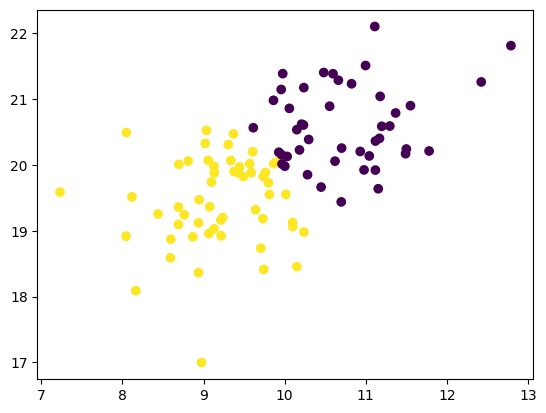

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

## Con libreria

In [ ]:
path = 'https://gist.githubusercontent.com/javierIA/0e388f3d74a0fedd21f33e8f48d144ff/raw/d884d7fab9313ef6f6db291f0307cc569fbb533d/custumers.csv'
df = pd.read_csv(path, sep='\t')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().mean()

CustomerID            0.0
Genre                 0.0
Age                   0.0
Annual_Income_(k$)    0.0
Spending_Score        0.0
dtype: float64

In [ ]:
X = df.iloc[:,[2,3]]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

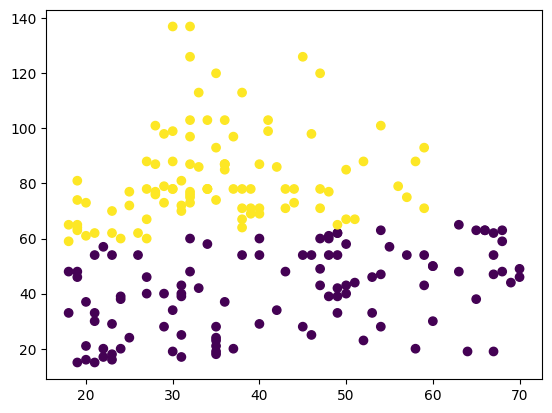

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_)
plt.show()

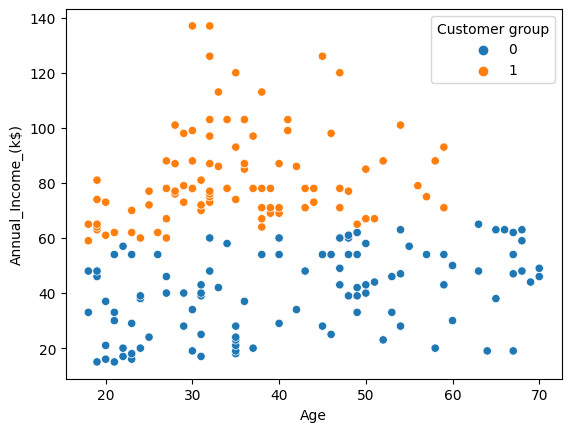

In [ ]:
import seaborn as sns
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=kmeans.labels_)
plt.legend(title='Customer group')
plt.show()

In [ ]:
elbow_values = list()

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(X)
  elbow_values.append(kmeans.inertia_)

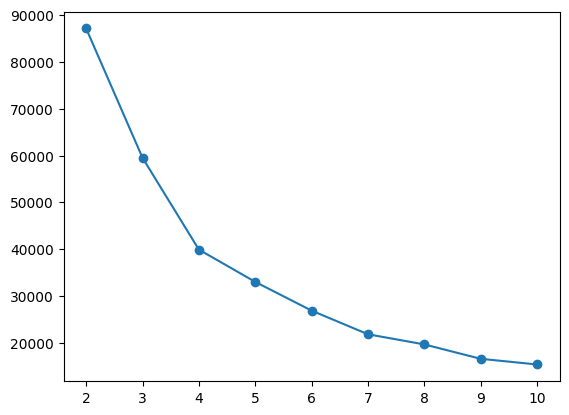

In [ ]:
plt.plot(range(2,11), elbow_values, marker='o')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


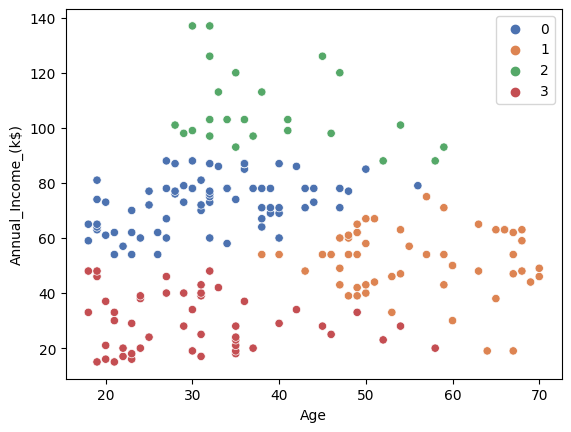

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=kmeans.labels_, palette="deep")
plt.show()